# **Линейная классификация и логистическая регрессия**

Коптев Данил

**Подключаем библиотеки**

In [ ]:
import sklearn as skl
import sklearn.model_selection as modSel
import sklearn.linear_model as linMod
import sklearn.metrics as metrics
import sklearn.datasets as ds
import numpy as np
import scipy.stats as sts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, SGDClassifier

**Задание 2**

1. Изучим  инструментарий  библиотеки sklearn для  работы  с  моделями  бинарной классификации

2. Сгенерируем модельный набор данных для задачи бинарной классификации в виде двух  облаков  точек:  общее  количество  точек  равно  200,  количество  признаков, характеризующих объекты, равно 2. Параметр, определяющий степень рассеянности данных, установить равным 5.5. Обеспечим воспроизводимость результатов, задав значение соответствующему параметру.

In [ ]:
x, y = ds.make_blobs(n_samples=200, n_features=2, cluster_std=5.5, random_state=25, centers=2)

3. Выведим сгенерированные координаты точек и метки классов.

In [ ]:
x

array([[  3.12748304,  -0.21039318],
       [ -5.87083755,  -8.36234473],
       [ -5.34216762,   1.47562693],
       [  9.74834619,   0.1189545 ],
       [ -5.03178629,   1.34028402],
       [  7.82257081,  -5.20795245],
       [  3.32208588,  -6.93400886],
       [ -3.95361198, -10.82980938],
       [  3.78138603,   0.56740495],
       [-18.46753264,  -8.7015885 ],
       [ 19.24374567,  -5.69509952],
       [  1.02016498,   3.37011681],
       [  8.46312745,  -0.12921819],
       [  4.84067889,  -4.60339107],
       [ -6.70184887,  -6.26064404],
       [ 15.23554257,   1.62798719],
       [ -2.82904159,  -6.14860234],
       [  8.59599248,  -1.83837649],
       [ 14.01097052,  -0.3754348 ],
       [ -2.9000765 ,  -9.83879508],
       [ -3.44828145,  -5.31822339],
       [-13.68892006,  -9.67081442],
       [ -3.15308599, -10.71153008],
       [-13.1297781 ,  -9.25078478],
       [ -0.88250856,  -6.19272097],
       [ 11.63163231,   7.8543033 ],
       [  2.42618415,   4.32742758],
 

In [ ]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1])

4. Выполним визуализацию сгенерированных облаков.

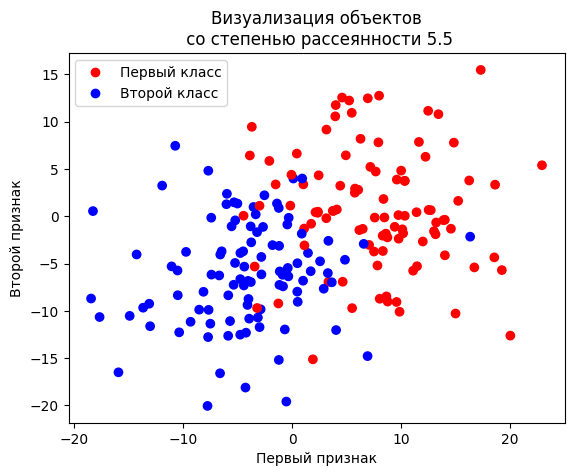

In [ ]:
def printPlt(x, y, index = 5.5):
  scatter = plt.scatter(x[:,0],x[:,1],c=y,cmap=ListedColormap(['red', 'blue']))
  plt.title("Визуализация объектов\n со степенью рассеянности " + str(index))
  plt.xlabel("Первый признак")
  plt.ylabel("Второй признак")
  plt.legend(handles=scatter.legend_elements()[0], labels=["Первый класс", "Второй класс"])

printPlt(x,y)

5. Поэкспериментируем  со  степенью  рассеянности  данных:  задам  значения соответствующего параметра равными 4, 7и 10, выведим графики в одном ряду с заголовками, сообщающими об используемом значении параметра.

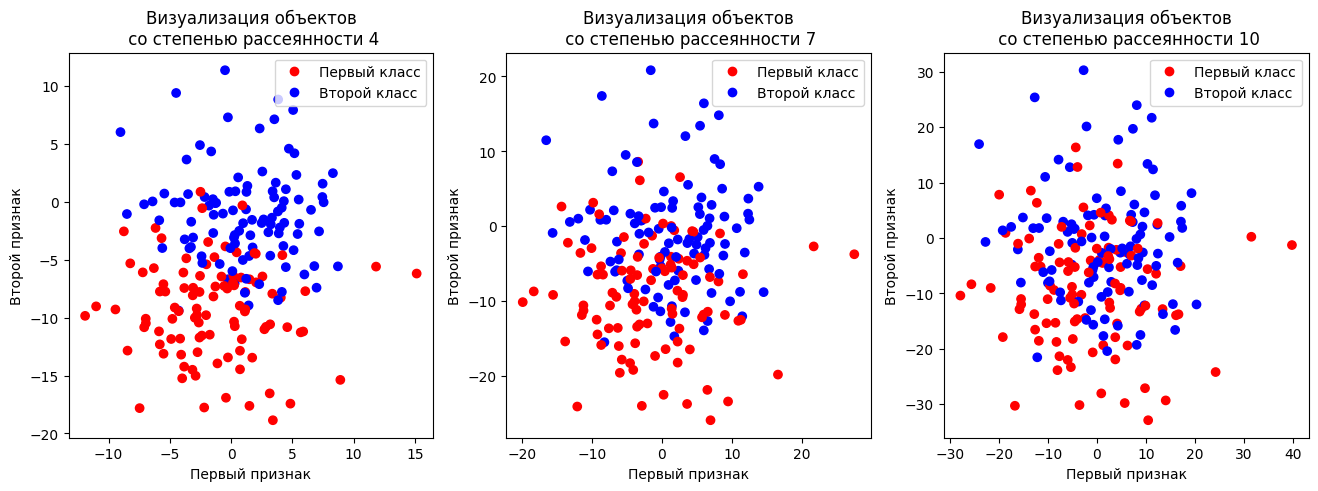

In [ ]:
clusters = [4, 7, 10]
plt.figure(figsize=(16,5))
index = 1
for cluster in clusters:
  plt.subplot(1, 3, index)
  _x, _y = ds.make_blobs(200, 2, random_state = 2, centers=2, cluster_std=cluster)
  printPlt(_x, _y, index = cluster)
  index+=1
plt.show()

**Анализ**: Мы можем наблюдать, что чем выше степень рассеивания, тем смещение точек ближе к центру, тем самым они начинают налаживаться друг на друга

6. Выполним разовое разбиение набора данных, полученного в п. 2, на обучающую и тестовую выборки в соотношении 70/30.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42 ,test_size=0.3, train_size=0.70)

7. Создадим модель линейной классификации, использующую 𝐿2-регуляризатор, и обучить ее  на  обучающей  выборке

In [ ]:
L2 = linMod.RidgeClassifier().fit(x_train,y_train)

8. Получить предсказания обученной модели для объектов тестовой выборки. Вывести массив  ответовна  тестовой  выборке  и  массив  предсказанных  моделью  значений. Оценить качество классификации с помощью метрики accuracy; дать интерпретацию полученной оценки.

In [ ]:
L2_predict = L2.predict(x_test)
L2_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
accuracy = metrics.accuracy_score(y_test, L2_predict)
accuracy

0.95

9. Создадим несколько моделей линейной классификации, используя SGDClassifier c $𝐿_2$ и $𝐿_1$ регуляризаторамии различными функциями потерь. Обучим модели на обучающей выборке. Оценим качество всех полученных классификаторов.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

allLoss = ['hinge', 'log_loss', 'modified_huber', 'squared_epsilon_insensitive', 'perceptron', 'squared_error', 'squared_hinge', 'huber', 'epsilon_insensitive']
allPenalty = ['l1', 'l2']
allAlpha = np.arange (0.001, 1, 0.004)

topL1 = []
topL2 = []

for penalty in allPenalty:
  for alpha in allAlpha:
    for loss in allLoss:
      sgd = SGDClassifier(penalty=penalty, alpha=alpha, loss=loss, random_state=42)
      sgd.fit(x_train, y_train)
      pred_sgd = sgd.predict(x_test)
      accuracy = metrics.accuracy_score(y_test, pred_sgd)
      if penalty == "l1" :
        topL1.append({"accuracy":accuracy, "loss":loss, "penalty":penalty, "alpha":alpha})
      else:
        topL2.append({"accuracy":accuracy, "loss":loss, "penalty":penalty, "alpha":alpha})

topL1.sort(key=lambda x: x["accuracy"], reverse=True)
topL2.sort(key=lambda x: x["accuracy"], reverse=True)

print("Составим топ 10 лучших моделей L1, сравнивнивая классификаторы по accuracy:")
for i in range (0, 10):
  print(str(i+1) + ". Регуляризатор", topL1[i]["penalty"].upper(), "с коэфицентом", topL1[i]["alpha"] ,"c функцией потерь", topL1[i]["loss"], "и accuracy равным", topL1[i]["accuracy"])

print("\nСоставим топ 10 лучших моделей L2, сравнивнивая классификаторы по accuracy:")
for i in range (0, 10):
  print(str(i+1) + ". Регуляризатор", topL2[i]["penalty"].upper(), "с коэфицентом", topL2[i]["alpha"] ,"c функцией потерь", topL2[i]["loss"], "и accuracy равным", topL2[i]["accuracy"])


Составим топ 10 лучших моделей L1, сравнивнивая классификаторы по accuracy:
1. Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95
2. Регуляризатор L1 с коэфицентом 0.001 c функцией потерь perceptron и accuracy равным 0.95
3. Регуляризатор L1 с коэфицентом 0.001 c функцией потерь squared_error и accuracy равным 0.95
4. Регуляризатор L1 с коэфицентом 0.001 c функцией потерь squared_hinge и accuracy равным 0.95
5. Регуляризатор L1 с коэфицентом 0.001 c функцией потерь epsilon_insensitive и accuracy равным 0.95
6. Регуляризатор L1 с коэфицентом 0.005 c функцией потерь log_loss и accuracy равным 0.95
7. Регуляризатор L1 с коэфицентом 0.005 c функцией потерь huber и accuracy равным 0.95
8. Регуляризатор L1 с коэфицентом 0.009000000000000001 c функцией потерь log_loss и accuracy равным 0.95
9. Регуляризатор L1 с коэфицентом 0.009000000000000001 c функцией потерь huber и accuracy равным 0.95
10. Регуляризатор L1 с коэфицентом 0.013000000000000001 c функцией 

10. Создать отчет по результатам выполнения пп. 7-9: постановка задачи, описание каждой модели (используемая функция потерь, используемый регуляризатор, используемое значение коэффициента регуляризации, полученные результаты, выводы).

**Отчет**

Перебрав коэфиценты регуляризации от 0.001 до 1 с шагом 0.004 для регулязитаров $L_1$ и $L_2$ мы пришли к выводу, что лучший $accuracy$ равен $0.95$.

Достигали данного результата функции потерь log_loss, perceptron, squared_error , squared_hinge и epsilon_insensitive для регулязитора $L_1$ с коэфицентом 0.001 

Так же данного результата достигала функция потерь hinge для регулязитора $L_1$ с коэфицентом 0.001 

Для дальнейший выполнений заданий выберим модели

* Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95

* Регуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95

**Задание 3**

1. Выберим  две  лучшие  (по  метрике accuracy)  модели  из  числа  классификаторов, полученных  при  выполнении  задания  2. Используя  инструментарий  модуля sklearn.metrics, оценим качество этих моделей с помощью 
метрик  precision, recall и F–меры (на обучающей и тестовой выборке отдельно).

По результатам работы **Задания 2** мы выявили, что лучшие модели являются: 

* Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95

* Регуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95

In [ ]:
L1 = SGDClassifier(penalty='l1', alpha=0.001, loss='log_loss', random_state=42)
L1.fit(x_train, y_train)
pred_l1 = L1.predict(x_test)
precision_l1 = metrics.precision_score(y_test, pred_l1)
recall_l1 = metrics.recall_score(y_test, pred_l1)
f_l1 = metrics.f1_score(y_test, pred_l1)

print('Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95')
print('precision = ', precision_l1)
print('recall = ', recall_l1)
print('F-мера = ', f_l1)

L2 = SGDClassifier(penalty='l2', alpha=0.001, loss='hinge', random_state=42)
L2.fit(x_train, y_train)
pred_l2 = L2.predict(x_test)
precision_l2 = metrics.precision_score(y_test, pred_l2)
recall_l2 = metrics.recall_score(y_test, pred_l2)
f_l2 = metrics.f1_score(y_test, pred_l2)

print('\nРегуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95')
print('precision = ', precision_l2)
print('recall = ', recall_l2)
print('F-мера = ', f_l2)

Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95
precision =  0.967741935483871
recall =  0.9375
F-мера =  0.9523809523809523

Регуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95
precision =  0.9310344827586207
recall =  0.84375
F-мера =  0.8852459016393444


**Оценка**:

При регуляризаторе $L_1$ с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95 наблюдатся низкий процент ложных срабатываний ≈3%, выяленно ≈93% объектов класса +1

При регуляризатору $L_2$ с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95 наблюдатся процент ложных срабатываний чуть выше ≈16%, выяленно ≈84% объектов класса +1

2. Получим матрицы ошибок. Используя эти матрицы, посчитаем (по формулам) значения precision, recallи F–меры, сравним полученные значения с результатами, полученными в п. 1.

In [ ]:
TN_l1, FP_l1, FN_l1, TP_l1 = metrics.confusion_matrix(y_test, pred_l1).ravel()
precision_metrics_l1 = TP_l1/(TP_l1 + FP_l1)
recall_metrics_l1 = TP_l1/(TP_l1 + FN_l1)
f_metrics_l1 = (2 * precision_metrics_l1 * recall_metrics_l1)/(precision_metrics_l1 + recall_metrics_l1)

print('Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95 по матрице')
print('precision = ', precision_metrics_l1)
print('recall = ', recall_metrics_l1)
print('F-мера = ', f_metrics_l1)

TN_l2, FP_l2, FN_l2, TP_l2 = metrics.confusion_matrix(y_test, pred_l2).ravel()
precision_metrics_l2 = TP_l2/(TP_l2 + FP_l1)
recall_metrics_l2 = TP_l2/(TP_l2 + FN_l2)
f_metrics_l2 = (2 * precision_metrics_l2 * recall_metrics_l2)/(precision_metrics_l2 + recall_metrics_l2)

print('\nРегуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95 по матрице')
print('precision = ', precision_metrics_l2)
print('recall = ', recall_metrics_l2)
print('F-мера = ', f_metrics_l2)

Регуляризатор L1 с коэфицентом 0.001 c функцией потерь log_loss и accuracy равным 0.95 по матрице
precision =  0.967741935483871
recall =  0.9375
F-мера =  0.9523809523809523

Регуляризатор L2 с коэфицентом 0.001 c функцией потерь hinge и accuracy равным 0.95 по матрице
precision =  0.9642857142857143
recall =  0.84375
F-мера =  0.8999999999999999


**Вывод**: значения не отличаются, следовательно формулы описаны верно

3. Получим для рассматриваемых моделей значения FPR и TPR (на обучающей и тестовой выборке отдельно). 


По тренировным данным AUC-ROC =  0.9511846405228758
По тестовым данным AUC-ROC =  0.9609374999999999


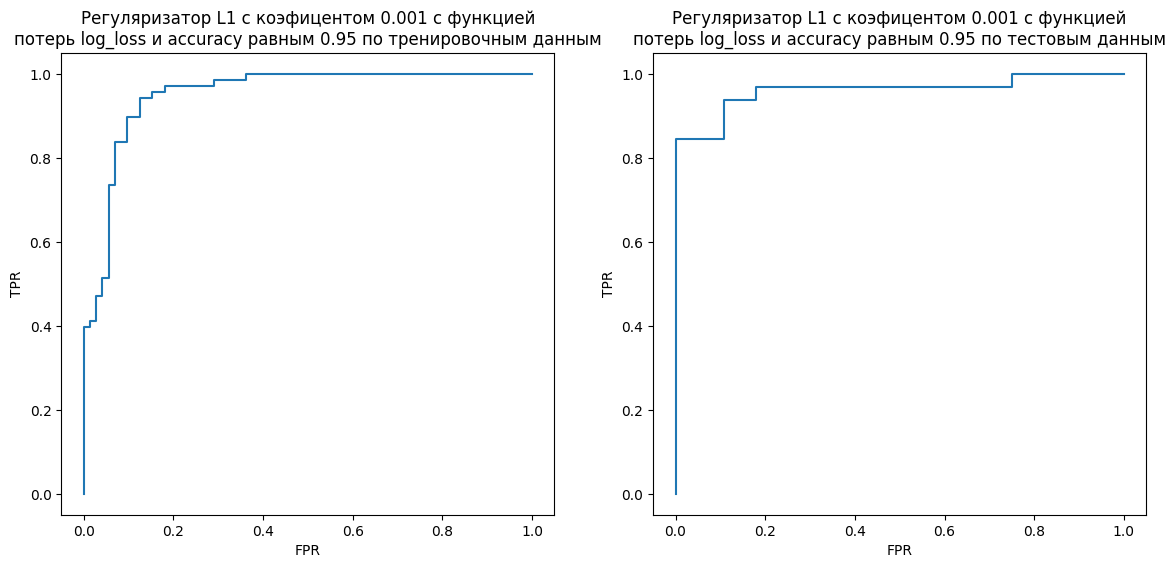

In [ ]:
plt.figure(figsize=(14,6))

score_train_l1 =L1.decision_function(x_train)
fpr_train_l1, tpr_train_l1, thresholds_train_l1 = metrics.roc_curve(y_train, score_train_l1)

plt.subplot(1,2,1)
plt.plot(fpr_train_l1, tpr_train_l1)
plt.title("Регуляризатор L1 с коэфицентом 0.001 c функцией\nпотерь log_loss и accuracy равным 0.95 по тренировочным данным")
plt.xlabel('FPR')
plt.ylabel('TPR')

score_test_l1 = L1.decision_function(x_test)
fpr_test_l1, tpr_test_l1, thresholds_test_l1 = metrics.roc_curve(y_test, score_test_l1)

plt.subplot(1,2,2)
plt.plot(fpr_test_l1, tpr_test_l1)
plt.title("Регуляризатор L1 с коэфицентом 0.001 c функцией\nпотерь log_loss и accuracy равным 0.95 по тестовым данным")
plt.xlabel('FPR')
plt.ylabel('TPR')

auc_roc_train_l1 = metrics.roc_auc_score(y_train, score_train_l1) 
print("По тренировным данным AUC-ROC = ", auc_roc_train_l1)
auc_roc_test_l1 = metrics.roc_auc_score(y_test, score_test_l1) 
print("По тестовым данным AUC-ROC = ", auc_roc_test_l1)

По тренировным данным AUC-ROC =  0.9426062091503267
По тестовым данным AUC-ROC =  0.9609374999999999


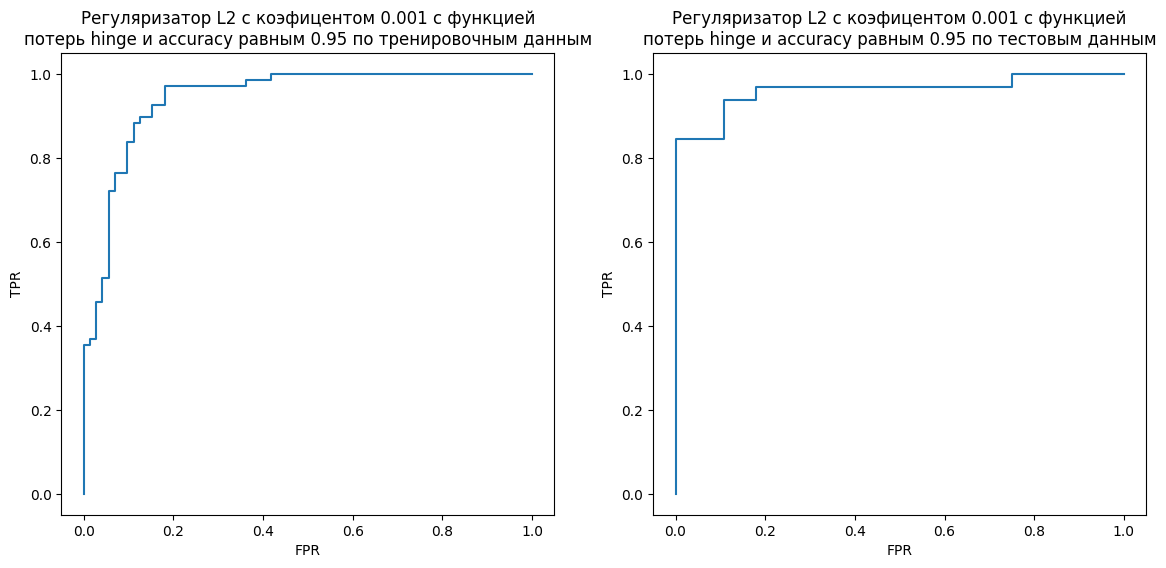

In [ ]:
plt.figure(figsize=(14,6))

score_train_l2 = L2.decision_function(x_train)
fpr_train_l2, tpr_train_l2, thresholds_train_l2 = metrics.roc_curve(y_train, score_train_l2)

plt.subplot(1,2,1)
plt.plot(fpr_train_l2, tpr_train_l2)
plt.title("Регуляризатор L2 с коэфицентом 0.001 c функцией\nпотерь hinge и accuracy равным 0.95 по тренировочным данным")
plt.xlabel('FPR')
plt.ylabel('TPR')

score_test_l2 = L2.decision_function(x_test)
fpr_test_l2, tpr_test_l2, thresholds_test_l2 = metrics.roc_curve(y_test, score_test_l2)

plt.subplot(1,2,2)
plt.plot(fpr_test_l2, tpr_test_l2)
plt.title("Регуляризатор L2 с коэфицентом 0.001 c функцией\nпотерь hinge и accuracy равным 0.95 по тестовым данным")
plt.xlabel('FPR')
plt.ylabel('TPR')

auc_roc_train_l2 = metrics.roc_auc_score(y_train, score_train_l2) 
print("По тренировным данным AUC-ROC = ", auc_roc_train_l2)
auc_roc_test_l2 = metrics.roc_auc_score(y_test, score_test_l2) 
print("По тестовым данным AUC-ROC = ", auc_roc_test_l2)

**Вывод**: значения AUC-ROC стремится к 1, что говорит о положительном качестве классификатора, а так же AUC-ROC тестовой выборки больше, чем для обучающей, это может быть связано с меньшим объемом выборки. График на тестовой выборке и на тренировочной выборке сопостовимы, что говорит о схожем происхождении данных

